<a href="https://colab.research.google.com/github/astrrr/Image-Processing-Lab/blob/main/Activity8_imageprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [923]:
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import glob
from keras.preprocessing import image
from scipy import spatial
import numpy as np
import math

# 8.1  Prepare features for Main image / Tile images

In [924]:
#Load main image
main_image = cv2.imread('/content/drive/MyDrive/img_processing_lab8_data/Background/pexels-全-记录-4330697.jpg')
main_image = cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB)
main_image = cv2.resize(main_image,(1000,1000))

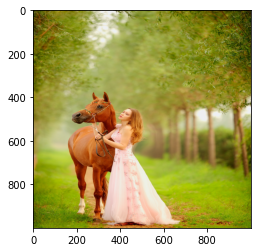

In [925]:
plt.imshow(main_image)
plt.show()

In [926]:
print(main_image.shape)

(1000, 1000, 3)


In [927]:
#Define tile size


height = 50
width = 50
tile_size = (width, height)


In [928]:
main_image[12:13].mean(axis=(0,1))

array([130.892, 133.17 ,  50.664])

In [929]:
main_image_feature = np.empty_like(main_image)
# Create main image feature grid of subimage
# Calculate average (mean) color of each subimage with tile_size


for i in range((main_image.shape[0])):
  for j in range((main_image.shape[1])):  
         
        
        #print(main_image[i][j][0])
        main_image_feature[i][j] = main_image[i*tile_size[0]:(i+1)*tile_size[0], j*tile_size[1]:(j+1)*tile_size[1]].mean(axis=(0,1))
        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


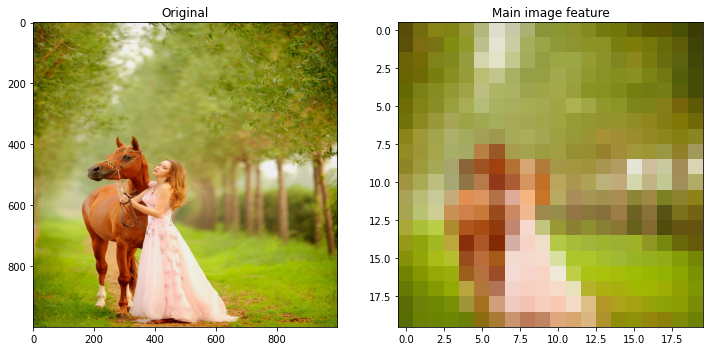

In [930]:
# Cropping an image
h = math.floor((main_image.shape[0])/height)
w = math.floor((main_image.shape[1])/width)
cropped_image = main_image_feature[0:h, 0:w]

 
# Display cropped image
fig = plt.figure(figsize=(12,12))

fig.add_subplot(121)
plt.title('Original')
plt.imshow(main_image)

fig.add_subplot(122)
plt.title('Main image feature')
plt.imshow(cropped_image)
plt.show()

* 8.1.2 PREPARE TILE IMAGES AND FEATURES

In [931]:
# Collect filenames of all tile images
All_files = glob.glob('/content/drive/MyDrive/img_processing_lab8_data/Background/*')

In [932]:
# Load tile images and resize to tile_size
tiles = []
for img in All_files:
  #tile = image.load_img(img, target_size=(200,200))
  tile = cv2.imread(img)
  tile = cv2.resize(tile, (height,width))
  tile = cv2.cvtColor(tile, cv2.COLOR_BGR2RGB)
  tiles.append(tile)

In [933]:
# Create array of average (mean) color of each tile image
Tile_features = []
for tile in tiles:
  mean_color = np.array(tile).mean(axis=(0,1))
  Tile_features.append(mean_color)

In [934]:
Tile_features[1]

array([110.4176, 117.9892,  87.742 ])

# 8.2 Image Clustering and Matching using KNN with KDTree Algorithm

In [935]:
#Create KDTree of tile color features
tree = spatial.KDTree(Tile_features)

In [936]:
#KNN (k=1) search for best matched tiles with each subimage
closest_tiles = np.zeros((height, width), dtype=np.uint32)
for i in range(height):
  for j in range(width):
    closest = tree.query(main_image_feature [i,j])
    #print(closest)
    closest_tiles[i, j] = closest[1]

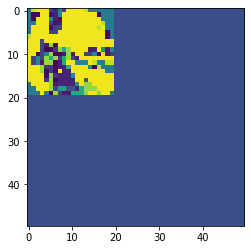

In [937]:
#cropped_closest_tiles = closest_tiles[0:h, 0:w]
cropped_closest_tiles = closest_tiles[0:h, 0:w]
plt.imshow(closest_tiles)

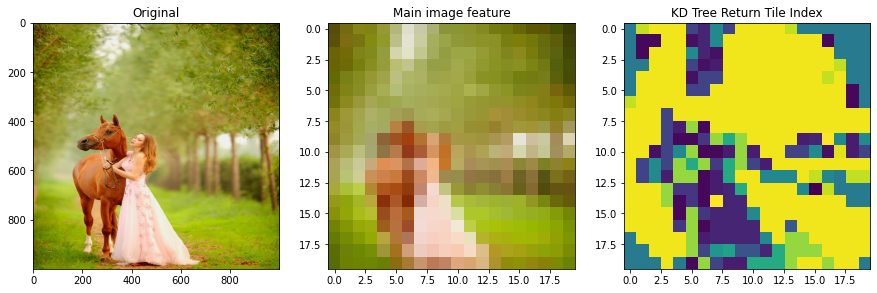

In [938]:
fig2 = plt.figure(figsize=(15,15))

fig2.add_subplot(131)
plt.title('Original')
plt.imshow(main_image)

fig2.add_subplot(132)
plt.title('Main image feature')
plt.imshow(cropped_image)

fig2.add_subplot(133)
plt.title('KD Tree Return Tile Index')
plt.imshow(cropped_closest_tiles)

plt.show()

# 8.3 CREATE IMAGE MOSAIC

In [939]:
output = np.array(main_image)
print(output.shape)
cropped_closest_tiles = np.expand_dims(cropped_closest_tiles,axis=0)

(1000, 1000, 3)


In [940]:

width = int(np.round (main_image.shape[0] / tile_size[0]))
height = int(np.round (main_image.shape[1] / tile_size[1]))

In [941]:
width

20

In [942]:
# Create an output image


output = np.array(main_image)
for i in range(height):
  for j in range(width):
    # Offset of tile
    x, y = i*tile_size[0], j*tile_size[1]
    # Index of tile
    index = closest_tiles[i, j]
    # Draw tile
    # print('x     : ', x)
    # print('x_til : ', (x+tile_size[0]))
    # print('y     : ', y)
    # print('y_til : ', (y+tile_size[1]))
    output[x:(x+tile_size[0]), y:(y+tile_size[1]), :] = tiles[index]

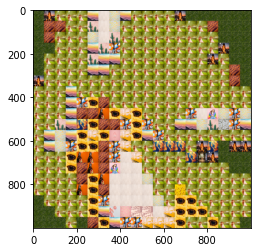

In [943]:
plt.imshow(output)

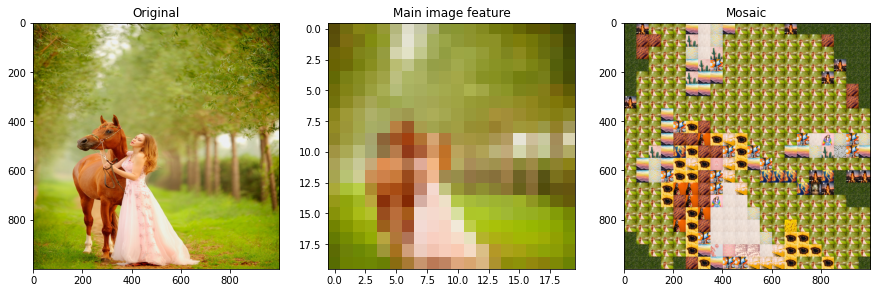

In [944]:
fig3 = plt.figure(figsize=(15,15))

fig3.add_subplot(131)
plt.title('Original')
plt.imshow(main_image)

fig3.add_subplot(132)
plt.title('Main image feature')
plt.imshow(cropped_image)

fig3.add_subplot(133)
plt.title('Mosaic')
plt.imshow(output)

plt.show()